In [1]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2  


In [2]:
## Now we will load our model 
model=torch.hub.load('ultralytics/yolov5','yolov5s') ##This would load the pretrained Ultralytics model from TorchHub

Using cache found in C:\Users\ANURAG/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-1-12 torch 1.10.1+cpu CPU

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
model

In [4]:
img = 'https://media.cntraveler.com/photos/53e2f41cdddaa35c30f66775/master/pass/highway-traffic.jpg'

In [5]:
results=model(img)
results.print()

C:\Users\ANURAG\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
image 1/1: 768x1024 7 persons, 36 cars, 1 motorcycle, 1 truck
Speed: 179.1ms pre-process, 254.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


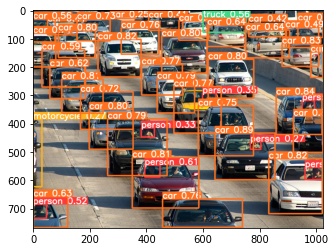

In [6]:
##Now we need to render this visually using matplotlib
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))  
plt.show()

In [ ]:
plt.imshow(np.squeeze(results.render()))

In [ ]:
# WE can do this using OpenCV too

#Open CV can be used for accesing our webcam



In [3]:

  
import cv2
# define a video capture object
cap= cv2.VideoCapture(0)
  
while cap.isOpened():
      
    # Capture the video frame
    # by frame
    ret, frame = cap.read()
    results=model(frame) ##Make detections Passing the frame from the webcam
    # Display the resulting frame
    cv2.imshow('DrowsinessDetection', np.squeeze(results.render())) ##To see the results in our window
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
cap.release()
# Destroy all the windows
cv2.destroyAllWindows()



C:\Users\ANURAG\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\ANURAG\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\ANURAG\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\ANURAG\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', 

In [7]:
#Now we are going to train our drowsiness detection
import uuid #To create a unique indentifier
import os
import time



In [8]:
##Writing code to capture images (drowsy/awake)

IMAGES_PATH=os.path.join('data','images') ## Where we're going to save our image data data/images/ -> would contain the images
labels=['awake','drowsy'] ##Two classes 
numberOfImages=25 

In [13]:
#Now we're gonna loop through our labels are for each of these we're going to collect 25 images
#Then we'll label them
cap=cv2.VideoCapture(0)
#Looping through the labels
for label in labels:
    print(f"Collecting images for {label} class")
    time.sleep(5)
    for img_num  in range(numberOfImages):
        print(f"Collecting image {img_num +1} for {label}")
        ret,frame=cap.read() #Webcam feed
        
        imgname=os.path.join(IMAGES_PATH,label+'.'+str(uuid.uuid1())+'.jpg')  ##Image path
        cv2.imwrite(imgname,frame) ##Writes the image to file
        cv2.imshow('Image Collection',frame) ##Looking at the image
        time.sleep(2)  ##Little delay between captures
        
    if cv2.waitKey(10) & 0xFF == ord('q'):
      break
  
# After the loop release the cap object
cap.release()
# Destroy all the windows
cv2.destroyAllWindows()    

In [14]:
!git clone https://github.com/tzutalin/labelImg


Cloning into 'labelImg'...


In [15]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [17]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt
##This effectively gives us our configurations for our training run (YAML)
##Our model is yolo
##Let's kick off our training

github: up to date with https://github.com/ultralytics/yolov5 
Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)
module 'signal' has no attribute 'SIGALRM'


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  v6.0-187-gf3085ac torch 1.10.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0


In [18]:
##Now we are going to load up our model
##We're gonna use the last.pt file

model=torch.hub.load('ultralytics/yolov5','custom',path='yolov5/runs/train/exp2/weights/last.pt',force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\ANURAG/.cache\torch\hub\master.zip
YOLOv5  2022-1-12 torch 1.10.1+cpu CPU

Fusing layers... 
Model Summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [25]:
##Our model is successfully loaded

img=os.path.join('data','images','awake.0cb0fd30-73a1-11ec-bcfc-00d86108e6fa.jpg')


In [26]:
results=model(img)

C:\Users\ANURAG\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


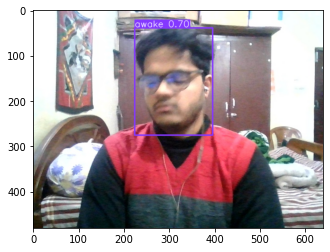

In [27]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()


In [29]:
import cv2
# define a video capture object
cap= cv2.VideoCapture(0)
  
while cap.isOpened():
      
    # Capture the video frame
    # by frame
    ret, frame = cap.read()
    results=model(frame) ##Make detections Passing the frame from the webcam
    # Display the resulting frame
    cv2.imshow('DrowsinessDetection', np.squeeze(results.render())) ##To see the results in our window
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
cap.release()
# Destroy all the windows
cv2.destroyAllWindows()


C:\Users\ANURAG\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\ANURAG\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\ANURAG\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\ANURAG\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', 